## Plot trends of the protein levels of various genes by CyTOF

 - [HLA-DR APC time course](#HLADR_allAPCs)
 - [HLA-DR Time course per animal in monocytes](#HLADR_monocytes)
 - [CD38 Time course per animal in monocytes](#CD38_monocytes)
 - [CD14 vs. CD16 comparison in monocytes](#CD14_Vs_CD16_monocytes)

Autosaving every 60 seconds


/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


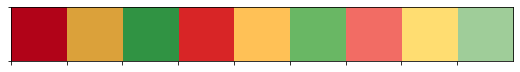

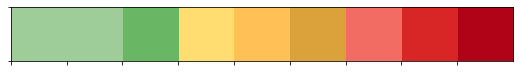

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%autosave 60

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import palettable

import sys
sys.path.append('../../../Code')
from utils import draw_box, get_box_ind

import matplotlib.gridspec as gridspec
from matplotlib import cm 
import matplotlib

gcs = False

colors = np.array([x for x in palettable.tableau.TrafficLight_9.mpl_colors])
sns.palplot(colors)
sns.palplot(colors[[8,8,5, 7, 4, 1, 6,3,0], :])
dpimap = dict(zip(['0', '1', '2', '3', '4', '5', '6', '7', '8'], colors[[8,8,5, 7, 4, 1, 6,3,0], :]))
dpimap['0'] = palettable.tableau.TableauMedium_10.mpl_colors[-1]

In [2]:
adir = '../../../../data/InVivo/Cytof/'
project_name = 'Full_IRF_SerialSac_Cytof_Fixid.1M'
results_dir = '../../../../results'


In [3]:
umap_file = os.path.join(adir, project_name + '.DoubletFilt.COMBAT.SubtractCNMF.SubclusterBMyeloidTNK.UMAP.Final.UMAPdata.tsv')
print(umap_file)
umapdata = pd.read_csv(umap_file, sep='\t', index_col=0)
umapdata.head()

../../../../data/InVivo/Cytof/Full_IRF_SerialSac_Cytof_Fixid.1M.DoubletFilt.COMBAT.SubtractCNMF.SubclusterBMyeloidTNK.UMAP.Final.UMAPdata.tsv


,DPI,DPIc,Multiplex_Barcode,Multiplex_Group,Period,animal,clinical_score,context,intensity_sum,is_doublet,...,Subclustering_clean,dpi_color,cluster_color,Multiplex_Group_Num,Multiplex_Group_Color,Ki67,CD38,HLA-DR,CD14,CD16
NHP07.D003.LIVE_34361-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,67.565610,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,1.194755,0.088050,4.446310,2.251268,4.320044
NHP07.D003.LIVE_116133-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,76.927710,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,1.671701,0.272825,3.999717,2.481711,1.392663
NHP07.D003.LIVE_117138-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,57.286858,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,1.577229,0.200688,3.195812,2.290937,0.664079
NHP07.D003.LIVE_94776-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,74.445320,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,1.279226,-0.064928,3.727512,1.516056,0.611337
NHP07.D003.LIVE_69626-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,68.663300,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,0.979667,0.664166,4.480372,3.089545,4.219157


In [4]:
from matplotlib import rcParams, font_manager
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42


fontpath = '../../../../data/misc/MyriadPro-Regular.ttf'
prop = font_manager.FontProperties(fname=fontpath)
rcParams['font.family'] = prop.get_name()

rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7

valdpi=100

<a id="HLADR_allAPCs"></a>
## HLA-DR Time course in all APCs

In [5]:
box_height=1.7
box_width=1.7
title_height=.15
left_space = .02
right_space = .98
bottom_space = .02
top_space = .98

dotsize=.2

In [43]:
celltypes = ['Mono','cDC', 'pDC', 'B']
periods = ['Baseline','Incubation', 'Early', 'Mid', 'Late']
pres = []
for ct in celltypes:
    ind1 = (umapdata['Subclustering_reduced']==ct) & (umapdata['Period']=='Baseline')
    for p in periods:
        ind2 = (umapdata['Subclustering_reduced']==ct) & (umapdata['Period']==p)
        (H,P) = ranksums(umapdata.loc[ind1, 'HLA-DR'], umapdata.loc[ind2, 'HLA-DR'])                                                 
        pres.append([ct, p, H, P])
                                                                    
        
pres = pd.DataFrame(pres)
pres

,0,1,2,3
0,Mono,Baseline,0.000000,1.000000e+00
1,Mono,Incubation,-4.573994,4.785135e-06
2,Mono,Early,16.627298,4.420882e-62
3,Mono,Mid,48.029045,0.000000e+00
4,Mono,Late,54.736775,0.000000e+00
5,cDC,Baseline,0.000000,1.000000e+00
6,cDC,Incubation,-2.861066,4.222198e-03
7,cDC,Early,-0.489987,6.241428e-01
8,cDC,Mid,1.539042,1.237942e-01
9,cDC,Late,-0.332330,7.396400e-01


2
3
4
12
13
17
18
19


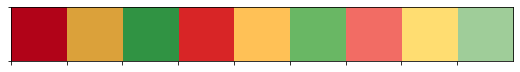

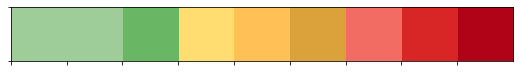

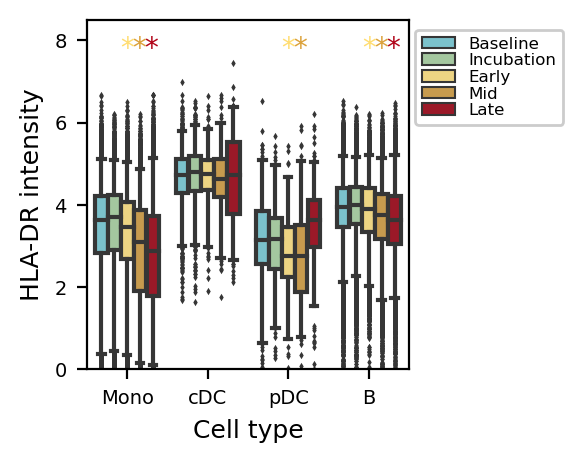

In [59]:
colors = np.array([x for x in palettable.tableau.TrafficLight_9.mpl_colors])
sns.palplot(colors)
sns.palplot(colors[[8,8,5, 7, 4, 1, 6,3,0], :])
dpimap = dict(zip(list(range(9)), colors[[8,8,5, 7, 4, 1, 6,3,0], :]))
dpimap[0] = palettable.tableau.TableauMedium_10.mpl_colors[-1]
periodmap = {'Baseline':dpimap[0],'Incubation':dpimap[1], 'Early':dpimap[3], 'Mid':dpimap[5], 'Late':dpimap[8]}


between_period_space = .1
between_celltype_space = .3
widths=.5

celltypes = ['Mono','cDC', 'pDC', 'B']
periods = ['Baseline','Incubation', 'Early', 'Mid', 'Late']
ind = umapdata['Subclustering_reduced'].isin(celltypes) #& ~((X['subcluster_celltype3']=='cDC') & (X['Period']=='Late'))

X_toplot = umapdata.loc[ind, :]

fig = plt.figure(constrained_layout=True, figsize=(2.8,2.2), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.4,
                       bottom=.2, right=.95, top=.9)
ax = fig.add_subplot(gs[0],
                     ylabel='', xlabel='',
                     title='')

sns.boxplot(x='Subclustering_reduced', y='HLA-DR', hue='Period', data=X_toplot,order=celltypes,
                 hue_order=periods, ax=ax, whis=[2.5, 97.5],
                 palette=periodmap, fliersize=.5)
ax.grid(False)

ax.set_ylim([0,8.5])
ax.legend(loc=(1.02,.7), markerscale=.5, fontsize=6, labelspacing=.1, framealpha=1)
ax.set_xlabel('Cell type')
ax.set_ylabel('HLA-DR intensity')




ctpos = {'Mono':0,'cDC':1,'pDC':2,'B':3}
shift = .15
ppos = {'Baseline':-2*shift, 'Incubation':-1*shift, 'Early':0, 'Mid':1*shift, 'Late':2*shift}
         

for i in pres.index:
    if (pres.loc[i, 2]>0) & (pres.loc[i, 3]<.05):
        xpos = ctpos[pres.loc[i, 0]] + ppos[pres.loc[i, 1]]
        print(i)
        ax.text(xpos,7.6, '*', ha='center', color=periodmap[pres.loc[i, 1]])




figfn = os.path.join(results_dir, "MHCloss.Invivo.APCCytof.Boxplot.pdf")
fig.savefig(figfn, dpi=200)

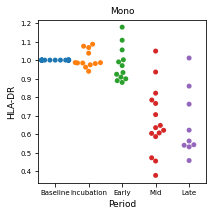

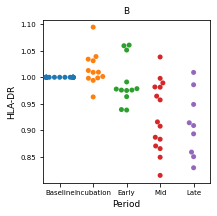

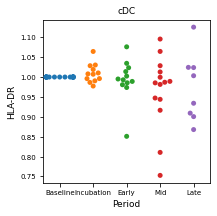

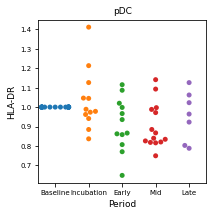

In [7]:
celltypes = ['Mono','B','cDC', 'pDC']

group_average = umapdata.groupby(['animal', 'Period', 'Subclustering_reduced'])['HLA-DR'].mean().reset_index()
ind = group_average['Subclustering_reduced'].isin(celltypes) 
group_average = group_average.loc[ind,:]
group_average_pivot = group_average.pivot_table(index='animal', columns=['Subclustering_reduced', 'Period'], values='HLA-DR')
group_average_pivot_norm = group_average_pivot.copy()

for c in celltypes:
    group_average_pivot_norm[c] = group_average_pivot_norm[c].div(group_average_pivot_norm[(c, 'Baseline')], axis=0)
    
    
group_average_pivot_norm_unstack = group_average_pivot_norm.unstack().reset_index().rename(columns={0:'HLA-DR'})

for ct in celltypes:
    subdat = group_average_pivot_norm_unstack.loc[group_average_pivot_norm_unstack['Subclustering_reduced']==ct,:]
    (fig,ax) = plt.subplots(1,1, figsize=(3,3))
    sns.swarmplot(x='Period', y='HLA-DR', data=subdat, ax=ax, order=['Baseline', 'Incubation', 'Early', 'Mid', 'Late'])
    ax.set_title(ct)


<a id="HLADR_monocytes"></a>
## HLA-DR Time course per animal in monocytes

In [8]:
mean_hla_value = umapdata.groupby(['animal', 'DPIc', 'Subclustering_reduced'])['HLA-DR'].mean().reset_index()
mean_hla_value_mono = mean_hla_value.loc[mean_hla_value['Subclustering_reduced']=='Mono',:]
mean_hla_value_mono_pivot = mean_hla_value_mono.pivot(index='animal', columns='DPIc', values='HLA-DR')
mean_hla_value_pivot_norm = mean_hla_value_mono_pivot.div(mean_hla_value_mono_pivot[0], axis=0)
mean_hla_value_pivot_norm_log = mean_hla_value_pivot_norm.apply(np.log2)
mean_hla_value_pivot_norm_log.drop(['NHPC1', 'NHPC2', 'NHPC3'], axis=0, inplace=True)

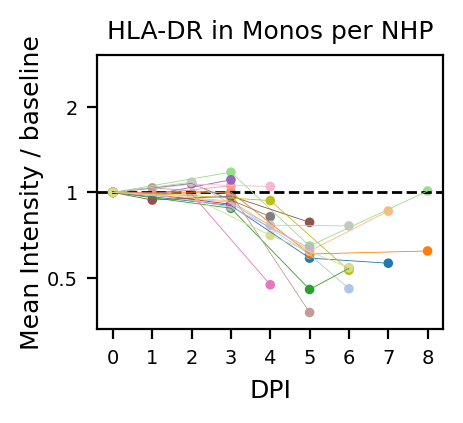

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(2.2,2), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.15,
                       bottom=.1, right=.95, top=.9)
ax = fig.add_subplot(gs[0],
                     ylabel='', xlabel='',
                     title='')

num=0
for i in mean_hla_value_pivot_norm_log.index:
    animal_val = mean_hla_value_pivot_norm_log.loc[i,:]
    animal_val = animal_val.dropna()
    ax.scatter(animal_val.index, animal_val.values, label=i, s=12,
             edgecolor='None', color=palettable.tableau.Tableau_20.hex_colors[num])
    ax.plot(animal_val.index, animal_val.values, linewidth=.3, 
          color=palettable.tableau.Tableau_20.hex_colors[num])
    num+=1

xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyle='--', linewidth=1)
ax.set_ylim([-1.6, 1.6])
ax.set_yticks([ -1,  0,  1])
ax.set_yticklabels([.5, 1, 2])

ax.set_xticks(np.arange(0,9))
ax.set_xlabel('DPI')
#ax.set_ylabel('Log Fold-change HLA-DR', labelpad=1)
ax.set_ylabel('Mean Intensity / baseline', labelpad=1)
ax.set_xlim(xlim)
ax.grid(False)
ax.set_title('HLA-DR in Monos per NHP')

figfn = os.path.join(results_dir, "MHCloss.Invivo.MonocyteCytof.SwarmplotAnimalColor.pdf")
fig.savefig(figfn, dpi=200)

In [10]:
from scipy.stats import ranksums
ranksums(mean_hla_value_mono.loc[mean_hla_value_mono['DPIc']==0, 'HLA-DR'],
mean_hla_value_mono.loc[mean_hla_value_mono['DPIc']>=5, 'HLA-DR'])

RanksumsResult(statistic=4.901894677425396, pvalue=9.491672398804045e-07)

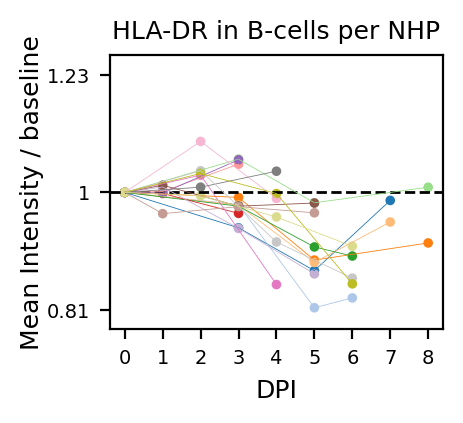

In [11]:
mean_hla_value = umapdata.groupby(['animal', 'DPIc', 'Subclustering_reduced'])['HLA-DR'].mean().reset_index()
mean_hla_value_B = mean_hla_value.loc[mean_hla_value['Subclustering_reduced']=='B',:]
mean_hla_value_B_pivot = mean_hla_value_B.pivot(index='animal', columns='DPIc', values='HLA-DR')
mean_hla_value_B_pivot_norm = mean_hla_value_B_pivot.div(mean_hla_value_B_pivot[0], axis=0)
mean_hla_value_B_pivot_norm_log = mean_hla_value_B_pivot_norm.apply(np.log2)
mean_hla_value_B_pivot_norm_log.drop(['NHPC1', 'NHPC2', 'NHPC3'], axis=0, inplace=True)

fig = plt.figure(constrained_layout=True, figsize=(2.2,2), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.15,
                       bottom=.1, right=.95, top=.9)
ax = fig.add_subplot(gs[0],
                     ylabel='', xlabel='',
                     title='')

num=0
for i in mean_hla_value_pivot_norm_log.index:
    animal_val = mean_hla_value_B_pivot_norm_log.loc[i,:]
    animal_val = animal_val.dropna()
    ax.scatter(animal_val.index, animal_val.values, label=i, s=12,
             edgecolor='None', color=palettable.tableau.Tableau_20.hex_colors[num])
    ax.plot(animal_val.index, animal_val.values, linewidth=.3, 
          color=palettable.tableau.Tableau_20.hex_colors[num])
    num+=1

xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyle='--', linewidth=1)
ax.set_ylim([-.35, .35])
ax.set_yticks([ -.3,  0,  .3])
ax.set_yticklabels(['%.2f' % (2**-.3), 1, '%.2f' % (2**.3)])
#ax.set_ylim([-1.6, 1.6])
#ax.set_yticks([ -1,  0,  1])
#ax.set_yticklabels([.5, 1, 2])

ax.set_xticks(np.arange(0,9))
ax.set_xlabel('DPI')
#ax.set_ylabel('Log Fold-change HLA-DR', labelpad=1)
ax.set_ylabel('Mean Intensity / baseline', labelpad=1)
ax.set_xlim(xlim)
ax.grid(False)
ax.set_title('HLA-DR in B-cells per NHP')

ax.set_xlim(xlim)
ax.grid(False)

figfn = os.path.join(results_dir, "MHCloss.Invivo.BCytof.SwarmplotAnimalColor.pdf")
fig.savefig(figfn, dpi=200)

In [12]:
from scipy.stats import ranksums
ranksums(mean_hla_value_B.loc[mean_hla_value_B['DPIc']==0, 'HLA-DR'],
mean_hla_value_B.loc[mean_hla_value_B['DPIc']>=5, 'HLA-DR'])

RanksumsResult(statistic=3.2397579764593134, pvalue=0.0011963119422029808)

<a id="CD38_monocytes"></a>
## CD38 Time course per animal in monocytes

In [13]:
mean_cd38_count = umapdata.groupby(['animal', 'DPIc', 'Subclustering_reduced'])['CD38'].count().reset_index()
mean_cd38_count_mono = mean_cd38_count.loc[mean_cd38_count['Subclustering_reduced']=='Mono',:]
mean_cd38_count_mono.sort_values(by='CD38').head(50)

,animal,DPIc,Subclustering_reduced,CD38
614,NHP22,6,Mono,102
391,NHP16,5,Mono,118
24,NHP07,5,Mono,144
154,NHP10,5,Mono,225
478,NHP18,5,Mono,287
67,NHP08,5,Mono,340
111,NHP09,5,Mono,375
197,NHP11,5,Mono,384
122,NHP09,8,Mono,406
237,NHP12,5,Mono,418


In [14]:
mean_cd38_value = umapdata.groupby(['animal', 'DPIc', 'Subclustering_reduced'])['CD38'].mean().reset_index()
mean_cd38_value_mono = mean_cd38_value.loc[mean_cd38_value['Subclustering_reduced']=='Mono',:]
mean_cd38value_mono_pivot = mean_cd38_value_mono.pivot(index='animal', columns='DPIc', values='CD38')
mean_cd38_value_pivot_norm = mean_cd38value_mono_pivot.div(mean_cd38value_mono_pivot[0], axis=0)
mean_cd38_value_pivot_norm_log = mean_cd38_value_pivot_norm.apply(np.log2)
mean_cd38_value_pivot_norm_log.drop(['NHPC1', 'NHPC2', 'NHPC3'], axis=0, inplace=True)

In [15]:
mean_cd38value_mono_pivot

DPIc,0,1,2,3,4,5,6,7,8
animal,,,,,,,,,
NHP07,0.477621,NaN,NaN,0.405813,NaN,1.542407,NaN,0.891167,NaN
NHP08,0.473630,NaN,NaN,0.374153,NaN,1.668112,2.414257,NaN,NaN
NHP09,0.304253,NaN,NaN,0.299814,NaN,1.468260,NaN,NaN,1.204761
NHP10,0.266106,NaN,NaN,0.285377,NaN,0.997017,NaN,1.625746,NaN
NHP11,0.370671,NaN,NaN,0.459033,NaN,1.295032,1.282020,NaN,NaN
NHP12,0.118567,NaN,NaN,0.012397,NaN,0.749211,NaN,NaN,1.029632
NHP13,0.491376,0.454249,NaN,0.491202,NaN,NaN,NaN,NaN,NaN
NHP14,0.533571,0.450372,NaN,0.571131,NaN,NaN,NaN,NaN,NaN
NHP15,0.428941,0.448901,NaN,0.507163,NaN,NaN,NaN,NaN,NaN


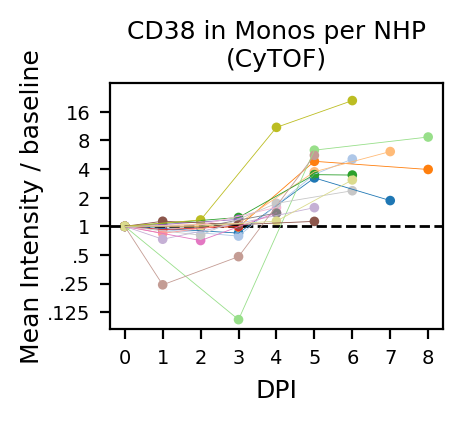

In [31]:
fig = plt.figure(constrained_layout=True, figsize=(2.2,2), dpi=200)
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.15,
                       bottom=.1, right=.95, top=.9)
ax = fig.add_subplot(gs[0],
                     ylabel='', xlabel='',
                     title='')

num=0
for i in mean_cd38_value_pivot_norm_log.index:
  animal_val = mean_cd38_value_pivot_norm_log.loc[i,:]
  animal_val = animal_val.dropna()
  ax.scatter(animal_val.index, animal_val.values, label=i, s=12,
             edgecolor='None', color=palettable.tableau.Tableau_20.hex_colors[num])
  ax.plot(animal_val.index, animal_val.values, linewidth=.3, 
          color=palettable.tableau.Tableau_20.hex_colors[num])
  num+=1

xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyle='--', linewidth=1)
ax.set_ylim([-3.6, 5.0])
ax.set_yticks(np.arange(-3, 5))
ax.set_yticklabels(['.125', '.25', '.5', '1', '2', '4', '8', '16'])

ax.set_xticks(np.arange(0,9))
ax.set_xlabel('DPI')
#ax.set_ylabel('Log Fold-change HLA-DR', labelpad=1)
ax.set_ylabel('Mean Intensity / baseline', labelpad=1)
ax.set_xlim(xlim)
ax.grid(False)
ax.set_title('CD38 in Monos per NHP\n(CyTOF)')

ax.set_xlim(xlim)
#ax.set_title('Monocyte CD38 timecourse per NHP')
figfn = os.path.join(results_dir, "CD38gain.Invivo.MonocyteCytof.SwarmplotAnimalColor.pdf")
fig.savefig(figfn, dpi=200)

<a id="CD14_Vs_CD16_monocytes"></a>
## CD14 vs. CD16 comparison in monocytes

In [17]:
ind = umapdata['Subclustering_reduced'] == 'Mono'
mono_cytof = umapdata.loc[ind,:]
mono_cytof.shape

(102997, 35)

In [18]:
mono_cytof.head()

,DPI,DPIc,Multiplex_Barcode,Multiplex_Group,Period,animal,clinical_score,context,intensity_sum,is_doublet,...,Subclustering_clean,dpi_color,cluster_color,Multiplex_Group_Num,Multiplex_Group_Color,Ki67,CD38,HLA-DR,CD14,CD16
NHP07.D003.LIVE_34361-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,67.565610,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,1.194755,0.088050,4.446310,2.251268,4.320044
NHP07.D003.LIVE_116133-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,76.927710,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,1.671701,0.272825,3.999717,2.481711,1.392663
NHP07.D003.LIVE_117138-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,57.286858,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,1.577229,0.200688,3.195812,2.290937,0.664079
NHP07.D003.LIVE_94776-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,74.445320,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,1.279226,-0.064928,3.727512,1.516056,0.611337
NHP07.D003.LIVE_69626-0,3,3,102_106_110,Barcode tube 2,Early,NHP07,0.0,LIVE,68.663300,False,...,Monocyte,#FFDD71,#2CA02C,2,#17BECF,0.979667,0.664166,4.480372,3.089545,4.219157


findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.


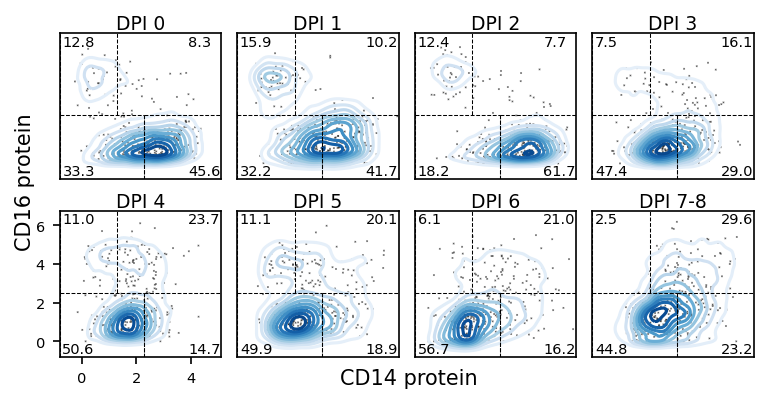

In [19]:
np.random.seed(14)


bw="scott"
clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
cut=6
gridsize=100
n_levels = 7

fig = plt.figure(figsize=(5,2.6), dpi=150)
gs = gridspec.GridSpec(2, 4, figure=fig, left=.4/6.2, hspace=.22, wspace=.1,
                        bottom=.1, right=.99, top=.93)

axes = []
for i in range(8):
    axes.append(fig.add_subplot(gs[i],
                ylabel='', xlabel='',
                title='', xticks=[], yticks=[],
                frameon=True, xlim=[-0.5,5.5], ylim=[-0.5,6.5]))
  
clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
cut=6
gridsize=100
n_levels = 10
nsamp = 300
dotsize = 1.
dpi = 0 
xlim=[-0.8,5.1]
ylim=[-0.8, 6.75]
marker = matplotlib.markers.MarkerStyle(marker='X')


CD16_right_boundary = 1.3
cd14_box = [2.3,2.3,6,6], [-.8, 2.5, 2.5, -0.8]
dneg_box2 = [xlim[0], xlim[0], cd14_box[0][1], cd14_box[0][1]], [cd14_box[1][0], cd14_box[1][1], cd14_box[1][1], cd14_box[1][0]]
x = CD16_right_boundary
m = (dneg_box2[1][2] -dneg_box2[1][1]) / (dneg_box2[0][2] -dneg_box2[0][1])
b = dneg_box2[1][2] - m*dneg_box2[0][2]
y = m*x+b
cd16_box = [xlim[0],xlim[0],CD16_right_boundary,CD16_right_boundary], [dneg_box2[1][1], 7,7, y]

percent_lab_fontsize=7
loc_pos = [(3.9, -.6), (-.7, -.6), (-.7, 6.1), (3.9,6.1)]
linetoskip=[(0,0,0,0), (0,0,0,0), (0,0,0,1)]

for dpi in range(8):
    if dpi == 7:
        ind = mono_cytof['DPIc'].isin([7,8])
        title = '7-8'
    else:
        ind = mono_cytof['DPIc'] == dpi
        title = dpi
  
    sns.kdeplot(mono_cytof.loc[ind,'CD14'], mono_cytof.loc[ind,'CD16'],
                n_levels=10, cmap=cm.Blues, bw=bw, gridsize=gridsize, cut=cut, clip=clip,
                ax=axes[dpi])

    axes[dpi].set_title('DPI %s' % title, pad=0)
    
    samp = mono_cytof.loc[ind,:].sample(nsamp, replace=False)
    axes[dpi].scatter(samp['CD14'], samp['CD16'], color='.1',
                  s=dotsize, alpha=.7, marker=marker, edgecolor='None')
  
    num_cells = []
    num_pos_cells = []
    for (i,box) in enumerate([cd14_box, dneg_box2, cd16_box]):
        draw_box(box[0], box[1], ax=axes[dpi], skipline=linetoskip[i])
        ind_box = get_box_ind(box[0], box[1], mono_cytof.loc[ind,'CD14'], mono_cytof.loc[ind,'CD16'])
        num_cells.append(ind_box.sum())

    num_cells.append(ind.sum() - sum(num_cells))
    num_cells = np.array(num_cells)
    frac_cells = num_cells / num_cells.sum()
    percent_str = ['%.1f' % (x*100) for x in (frac_cells)]
    for i in range(len(loc_pos)):
        axes[dpi].text(loc_pos[i][0], loc_pos[i][1], percent_str[i], fontsize=percent_lab_fontsize)        
        
    if dpi == 4:
        axes[dpi].set_yticks([0, 2, 4, 6])
        axes[dpi].set_xticks([0, 2, 4])
    else:
        axes[dpi].set_xticks([])
        axes[dpi].set_yticks([])

    axes[dpi].set_xlabel('')
    axes[dpi].set_ylabel('')

        
    axes[dpi].set_xlim(xlim)
    axes[dpi].set_ylim(ylim)


plt.figtext(.53, 0.02 , 'CD14 protein', va='bottom', ha='center')
plt.figtext(0.005, 0.55 , 'CD16 protein', va='center', ha='left', rotation=90)

figfn = os.path.join(results_dir, "MonoCD14CD16shift.Invivo.Cytof.KDEplot.pdf")
fig.savefig(figfn, dpi=200)

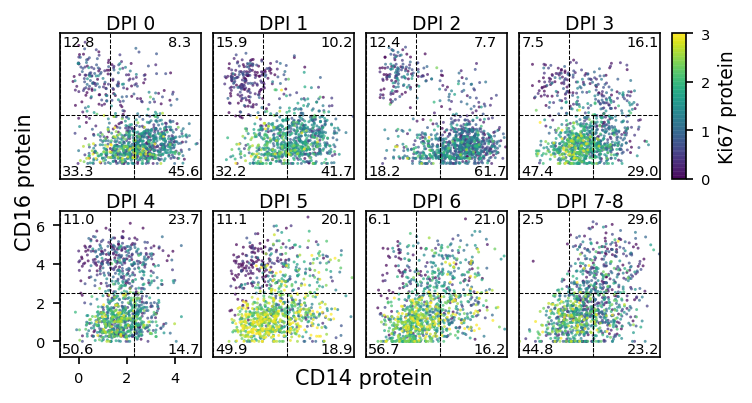

In [20]:
np.random.seed(14)


bw="scott"
clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
cut=6
gridsize=100
n_levels = 7

fig = plt.figure(figsize=(5,2.6), dpi=150)
gs = gridspec.GridSpec(2, 5, figure=fig, left=.4/6.2, hspace=.22, wspace=.1,
                        bottom=.1, right=.9, top=.93, width_ratios=[1,1,1,1,.1])

axes = []
for i in range(2):
    for j in range(4):
        axes.append(fig.add_subplot(gs[i, j],
                ylabel='', xlabel='',
                title='', xticks=[], yticks=[],
                frameon=True, xlim=[-0.5,5.5], ylim=[-0.5,6.5]))
    
cbar_ax = fig.add_subplot(gs[0, 4],
                ylabel='', xlabel='',
                title='', xticks=[], yticks=[],
                frameon=True, xlim=[-0,1], ylim=[0,1])
  
clip = [(-np.inf, np.inf), (-np.inf, np.inf)]
cut=6
gridsize=100
n_levels = 10
nsamp = 1000
dotsize = 2.
dpi = 0 
xlim=[-0.8,5.1]
ylim=[-0.8, 6.75]
marker = matplotlib.markers.MarkerStyle(marker='X')


CD16_right_boundary = 1.3
cd14_box = [2.3,2.3,6,6], [-.8, 2.5, 2.5, -0.8]
dneg_box2 = [xlim[0], xlim[0], cd14_box[0][1], cd14_box[0][1]], [cd14_box[1][0], cd14_box[1][1], cd14_box[1][1], cd14_box[1][0]]
x = CD16_right_boundary
m = (dneg_box2[1][2] -dneg_box2[1][1]) / (dneg_box2[0][2] -dneg_box2[0][1])
b = dneg_box2[1][2] - m*dneg_box2[0][2]
y = m*x+b
cd16_box = [xlim[0],xlim[0],CD16_right_boundary,CD16_right_boundary], [dneg_box2[1][1], 7,7, y]

percent_lab_fontsize=7
loc_pos = [(3.7, -.6), (-.7, -.6), (-.7, 6.1), (3.7,6.1)]
linetoskip=[(0,0,0,0), (0,0,0,0), (0,0,0,1)]
colorvar = 'Ki67'
vmin=0
vmax=3

for dpi in range(8):
    if dpi == 7:
        ind = mono_cytof['DPIc'].isin([7,8])
        title = '7-8'
    else:
        ind = mono_cytof['DPIc'] == dpi
        title = dpi
  
    #sns.kdeplot(mono_cytof.loc[ind,'CD14'], mono_cytof.loc[ind,'CD16'],
    #            n_levels=10, cmap=cm.Blues, bw=bw, gridsize=gridsize, cut=cut, clip=clip,
    #            ax=axes[dpi])

    axes[dpi].set_title('DPI %s' % title, pad=0)
    
    samp = mono_cytof.loc[ind,:].sample(nsamp, replace=False)
    samp = samp.sort_values(by=colorvar, ascending=True)
    scatter_im = axes[dpi].scatter(samp['CD14'], samp['CD16'], c=samp[colorvar],
                      s=dotsize, alpha=.7, edgecolor='None', vmin=vmin,
                      vmax=vmax, rasterized=True)
  
    num_cells = []
    num_pos_cells = []
    for (i,box) in enumerate([cd14_box, dneg_box2, cd16_box]):
        draw_box(box[0], box[1], ax=axes[dpi], skipline=linetoskip[i])
        ind_box = get_box_ind(box[0], box[1], mono_cytof.loc[ind,'CD14'], mono_cytof.loc[ind,'CD16'])
        num_cells.append(ind_box.sum())

    num_cells.append(ind.sum() - sum(num_cells))
    num_cells = np.array(num_cells)
    frac_cells = num_cells / num_cells.sum()
    percent_str = ['%.1f' % (x*100) for x in (frac_cells)]
    for i in range(len(loc_pos)):
        axes[dpi].text(loc_pos[i][0], loc_pos[i][1], percent_str[i], fontsize=percent_lab_fontsize)

    if dpi == 4:
        axes[dpi].set_yticks([0, 2, 4, 6])
        axes[dpi].set_xticks([0, 2, 4])
    else:
        axes[dpi].set_xticks([])
        axes[dpi].set_yticks([])

    axes[dpi].set_xlabel('')
    axes[dpi].set_ylabel('')

        
    axes[dpi].set_xlim(xlim)
    axes[dpi].set_ylim(ylim)

plt.colorbar(scatter_im, cax=cbar_ax, ticks=[0,1,2,3], label='Ki67 protein')

plt.figtext(.47, 0.02 , 'CD14 protein', va='bottom', ha='center')
plt.figtext(0.005, 0.55 , 'CD16 protein', va='center', ha='left', rotation=90)

figfn = os.path.join(results_dir, "MonoCD14CD16shift.Invivo.Cytof.Ki67.Scatter.pdf")
fig.savefig(figfn, dpi=300)

In [21]:
mono_cytof['bin'] = 'DP'
lab = ['CD14+', 'CD16+', 'DN']
for (i,box) in enumerate([cd14_box, cd16_box, dneg_box2]):
  ind_box = get_box_ind(box[0], box[1], mono_cytof.loc[:,'CD14'], mono_cytof.loc[:,'CD16'])
  mono_cytof.loc[ind_box, 'bin'] = lab[i]

/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/envs/seqwell/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
order = ['CD16+',  'DP', 'CD14+', 'DN']
colors = palettable.tableau.Tableau_10.hex_colors
bincolors = [colors[0], colors[2], colors[3], colors[4]]
category_palette_map = dict(zip(order, bincolors))

In [23]:
from matplotlib import rcParams, font_manager
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42


fontpath = '../../../../data/misc/MyriadPro-Regular.ttf'
prop = font_manager.FontProperties(fname=fontpath)
rcParams['font.family'] = prop.get_name()

rcParams['axes.titlesize'] = 9
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 7
rcParams['ytick.labelsize'] = 7

valdpi=100

findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.


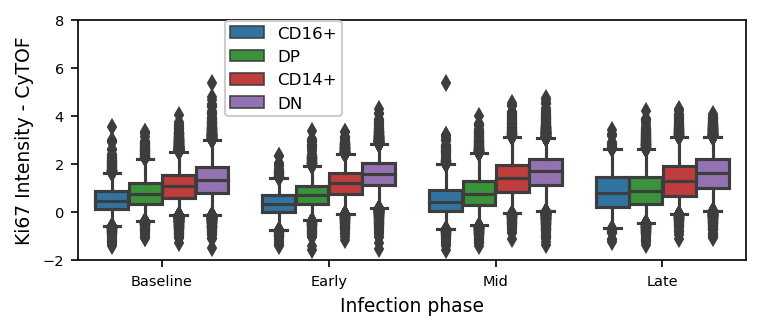

In [24]:
fig = plt.figure(figsize=(5, 2), dpi=150)
gs = gridspec.GridSpec(1, 1, fig, left=.1, bottom=.18, right=.99,top=.98,
                       hspace=0.05, wspace=0.05)
ax = fig.add_subplot(gs[0],
          xscale='linear', yscale='linear',
          frameon=True, ylabel='', xlabel='',
          title='',
          xticks=[])


order = ['Baseline', 'Early', 'Mid', 'Late']
hue_order = ['CD16+', 'DP', 'CD14+', 'DN']

sns.boxplot(x='Period', y='Ki67', hue='bin', data=mono_cytof,
            hue_order=hue_order, order=order, ax=ax, whis=[2.5, 97.5],
            palette=category_palette_map)

ax.set_ylabel('Ki67 Intensity - CyTOF')
ax.set_xlabel('Infection phase')
ax.set_ylim([-2,8])

ax.legend(loc=(0.22,.6), fontsize=8, title_fontsize=7, borderpad=.3, framealpha=1)

figfn = os.path.join(results_dir, "Ki67MonoLevels.MonoCategoryAndPeriod.Invivo.CyTOF.Boxplot.pdf")
fig.savefig(figfn, dpi=200)